# **Prediction Model**

Checklist:

✔ Data preprocessing

✔ EDA

✔ Feature Engineering

✔ ML Model




## **DATA PREPROCESSING**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
le=LabelEncoder()

In [ ]:
#importing libraries
df=pd.read_csv("/content/drive/MyDrive/H2HBABBA2751.csv")
df.head(20)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200424504,M foundation,2019-07-30 00:00:00,2019.00000,1929487791.00000,2019-06-17,20190613,20190617,20190715.00000,USD,RV,1.00000,nan,10888.81000,20190715.00000,NATL,1929487791.00000,0
1,U001,0200772670,ASSOCIAT foundation,NaN,2020.00000,1930760439.00000,2020-04-07,20200407,20200407,20200422.00000,USD,RV,1.00000,nan,9302.66000,20200407.00000,NAU5,1930760439.00000,1
2,U001,0200794332,COST associates,2019-02-08 00:00:00,2019.00000,1928647633.00000,2019-01-21,20190118,20190121,20190205.00000,USD,RV,1.00000,nan,10104.04000,20190121.00000,NAAX,1928647633.00000,0
3,U001,0200769623,WAL-MAR associates,2020-02-18 00:00:00,2020.00000,1930479821.00000,2020-02-07,20200205,20200207,20200222.00000,USD,RV,1.00000,nan,54690.75000,20200207.00000,NAH4,1930479821.00000,0
4,U001,0200331749,SYSC corp,2019-06-19 00:00:00,2019.00000,1929411911.00000,2019-05-31,20190531,20190531,20190615.00000,USD,RV,1.00000,nan,2112.40000,20190531.00000,NAA8,1929411911.00000,0
5,U001,0200769623,WAL-MAR us,2019-12-18 00:00:00,2019.00000,1930200314.00000,2019-11-30,20191127,20191130,20191215.00000,USD,RV,1.00000,nan,4391.67000,20191130.00000,NAH4,1930200314.00000,0
6,U001,0100046048,SYS foundation,2019-07-02 00:00:00,2019.00000,1929481752.00000,2019-06-18,20190612,20190618,20190703.00000,USD,RV,1.00000,nan,6940.38000,20190618.00000,NAA8,1929481752.00000,0
7,U001,0200772595,SAFEW foundation,2019-07-29 00:00:00,2019.00000,1929617547.00000,2019-07-13,20190713,20190713,20190728.00000,USD,RV,1.00000,nan,49582.70000,20190713.00000,NAA8,1929617547.00000,0
8,U001,0200794332,COST corporation,2019-08-22 00:00:00,2019.00000,1929700586.00000,2019-08-06,20190804,20190806,20190821.00000,USD,RV,1.00000,nan,20557.14000,20190806.00000,NAAX,1929700586.00000,0
9,U001,0200759878,SA systems,2019-02-19 00:00:00,2019.00000,1928713221.00000,2019-01-30,20190131,20190130,20190214.00000,USD,RV,1.00000,nan,46011.36000,20190130.00000,NAH4,1928713221.00000,0


In [ ]:
#checking shape and datatypes; analysing dataset
print(df.shape)
print(df.size)

(50000, 19)
950000


In [ ]:
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [ ]:
# checking constant columns and dropping them
unique_cols =  [x for x in df.columns if df[x].nunique()==1] 
print(unique_cols)
df.drop(unique_cols,axis=1,inplace=True)
df.columns

['posting_id']


Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [ ]:
#checking missing value percentage 
df.isnull().mean()

business_code            0.00000
cust_number              0.00000
name_customer            0.00000
clear_date               0.20000
buisness_year            0.00000
doc_id                   0.00000
posting_date             0.00000
document_create_date     0.00000
document_create_date.1   0.00000
due_in_date              0.00000
invoice_currency         0.00000
document type            0.00000
area_business            1.00000
total_open_amount        0.00000
baseline_create_date     0.00000
cust_payment_terms       0.00000
invoice_id               0.00012
isOpen                   0.00000
dtype: float64

In [ ]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.00000,50000.00000,50000.00000,50000.00000,50000.00000,0.00000,50000.00000,50000.00000,49994.00000,50000.00000
mean,2019.30384,2010676908.94420,20193492.72546,20193520.52330,20193653.41024,nan,32269.07837,20193521.60192,2009778082.30700,0.20000
std,0.45992,286228150.42920,4481.10328,4465.97912,4462.42757,nan,39356.70559,4465.08420,274233187.20184,0.40000
min,2019.00000,1928501758.00000,20181228.00000,20181230.00000,20181031.00000,nan,1.50000,20181016.00000,1928501758.00000,0.00000
25%,2019.00000,1929322852.50000,20190504.00000,20190504.00000,20190523.00000,nan,4821.77000,20190504.00000,1929322796.25000,0.00000
50%,2019.00000,1929950031.50000,20190906.00000,20190906.00000,20190924.00000,nan,17540.28000,20190906.00000,1929948937.50000,0.00000
75%,2020.00000,1930612053.25000,20200129.00000,20200130.00000,20200215.00000,nan,46957.03750,20200130.00000,1930611973.75000,0.00000
max,2020.00000,9500000130.00000,20200519.00000,20200520.00000,20200711.00000,nan,816385.81000,20200520.00000,2960635652.00000,1.00000


In [ ]:
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [ ]:
#changing datatypes of columns as required
df[['due_in_date','baseline_create_date','buisness_year']]=df[['due_in_date','baseline_create_date','buisness_year']].astype('int64')
df[['clear_date','posting_date','document_create_date','document_create_date.1','due_in_date','baseline_create_date']]=df[['clear_date','posting_date','document_create_date','document_create_date.1','due_in_date','baseline_create_date']].astype(str)

In [ ]:
#changing to datetime format
df['posting_date']= pd.to_datetime(df['posting_date'])
df['document_create_date']=pd.to_datetime(df['document_create_date'],format="%Y-%m-%d")
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'],format="%Y-%m-%d")
df['clear_date']=pd.to_datetime(df['clear_date'],format="%Y-%m-%d")
df['due_in_date']=pd.to_datetime(df['due_in_date'],format="%Y-%m-%d")
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format="%Y-%m-%d")
df


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200424504,M foundation,2019-07-30,2019,1929487791.00000,2019-06-17,2019-06-13,2019-06-17,2019-07-15,USD,RV,nan,10888.81000,2019-07-15,NATL,1929487791.00000,0
1,U001,0200772670,ASSOCIAT foundation,NaT,2020,1930760439.00000,2020-04-07,2020-04-07,2020-04-07,2020-04-22,USD,RV,nan,9302.66000,2020-04-07,NAU5,1930760439.00000,1
2,U001,0200794332,COST associates,2019-02-08,2019,1928647633.00000,2019-01-21,2019-01-18,2019-01-21,2019-02-05,USD,RV,nan,10104.04000,2019-01-21,NAAX,1928647633.00000,0
3,U001,0200769623,WAL-MAR associates,2020-02-18,2020,1930479821.00000,2020-02-07,2020-02-05,2020-02-07,2020-02-22,USD,RV,nan,54690.75000,2020-02-07,NAH4,1930479821.00000,0
4,U001,0200331749,SYSC corp,2019-06-19,2019,1929411911.00000,2019-05-31,2019-05-31,2019-05-31,2019-06-15,USD,RV,nan,2112.40000,2019-05-31,NAA8,1929411911.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200290370,BARGAIN systems,2019-05-21,2019,1929229908.00000,2019-05-03,2019-04-29,2019-05-03,2019-05-18,USD,RV,nan,24879.17000,2019-05-03,NAA8,1929229908.00000,0
49996,U001,0200769623,WAL-MAR,2019-05-01,2019,1929175013.00000,2019-04-20,2019-04-19,2019-04-20,2019-05-05,USD,RV,nan,7694.72000,2019-04-20,NAH4,1929175013.00000,0
49997,CA02,0140106293,ATLANT foundation,2019-06-10,2019,2960550722.00000,2019-05-23,2019-05-23,2019-05-23,2019-06-10,CAD,RV,nan,20020.15000,2019-05-31,CA10,2960550722.00000,0
49998,U001,200726979,BJ'S associates,NaT,2020,1930656003.00000,2020-03-17,2020-03-16,2020-03-17,2020-04-01,USD,RV,nan,321.52000,2020-03-17,NAA8,1930656003.00000,1


In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['doc_id']=df['doc_id'].astype('int64')
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200424504,M foundation,2019-07-30,2019,1929487791,2019-06-17,2019-06-13,2019-06-17,2019-07-15,USD,RV,nan,10888.81000,2019-07-15,NATL,1929487791.00000,0
1,U001,0200772670,ASSOCIAT foundation,NaT,2020,1930760439,2020-04-07,2020-04-07,2020-04-07,2020-04-22,USD,RV,nan,9302.66000,2020-04-07,NAU5,1930760439.00000,1
2,U001,0200794332,COST associates,2019-02-08,2019,1928647633,2019-01-21,2019-01-18,2019-01-21,2019-02-05,USD,RV,nan,10104.04000,2019-01-21,NAAX,1928647633.00000,0
3,U001,0200769623,WAL-MAR associates,2020-02-18,2020,1930479821,2020-02-07,2020-02-05,2020-02-07,2020-02-22,USD,RV,nan,54690.75000,2020-02-07,NAH4,1930479821.00000,0
4,U001,0200331749,SYSC corp,2019-06-19,2019,1929411911,2019-05-31,2019-05-31,2019-05-31,2019-06-15,USD,RV,nan,2112.40000,2019-05-31,NAA8,1929411911.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200290370,BARGAIN systems,2019-05-21,2019,1929229908,2019-05-03,2019-04-29,2019-05-03,2019-05-18,USD,RV,nan,24879.17000,2019-05-03,NAA8,1929229908.00000,0
49996,U001,0200769623,WAL-MAR,2019-05-01,2019,1929175013,2019-04-20,2019-04-19,2019-04-20,2019-05-05,USD,RV,nan,7694.72000,2019-04-20,NAH4,1929175013.00000,0
49997,CA02,0140106293,ATLANT foundation,2019-06-10,2019,2960550722,2019-05-23,2019-05-23,2019-05-23,2019-06-10,CAD,RV,nan,20020.15000,2019-05-31,CA10,2960550722.00000,0
49998,U001,200726979,BJ'S associates,NaT,2020,1930656003,2020-03-17,2020-03-16,2020-03-17,2020-04-01,USD,RV,nan,321.52000,2020-03-17,NAA8,1930656003.00000,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  int64         
 5   doc_id                  50000 non-null  int64         
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  area_business           0 non-null      float6

In [ ]:
(df['doc_id']==df['invoice_id']).value_counts()

True     49994
False        6
dtype: int64

In [ ]:
#converting CAD to USD
df['total_open_amount'] = np.where(df['invoice_currency'] == 'CAD',0.81*df['total_open_amount'] , df['total_open_amount']) 

In [ ]:
df.head(20)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200424504,M foundation,2019-07-30,2019,1929487791,2019-06-17,2019-06-13,2019-06-17,2019-07-15,USD,RV,nan,10888.81000,2019-07-15,NATL,1929487791.00000,0
1,U001,0200772670,ASSOCIAT foundation,NaT,2020,1930760439,2020-04-07,2020-04-07,2020-04-07,2020-04-22,USD,RV,nan,9302.66000,2020-04-07,NAU5,1930760439.00000,1
2,U001,0200794332,COST associates,2019-02-08,2019,1928647633,2019-01-21,2019-01-18,2019-01-21,2019-02-05,USD,RV,nan,10104.04000,2019-01-21,NAAX,1928647633.00000,0
3,U001,0200769623,WAL-MAR associates,2020-02-18,2020,1930479821,2020-02-07,2020-02-05,2020-02-07,2020-02-22,USD,RV,nan,54690.75000,2020-02-07,NAH4,1930479821.00000,0
4,U001,0200331749,SYSC corp,2019-06-19,2019,1929411911,2019-05-31,2019-05-31,2019-05-31,2019-06-15,USD,RV,nan,2112.40000,2019-05-31,NAA8,1929411911.00000,0
5,U001,0200769623,WAL-MAR us,2019-12-18,2019,1930200314,2019-11-30,2019-11-27,2019-11-30,2019-12-15,USD,RV,nan,4391.67000,2019-11-30,NAH4,1930200314.00000,0
6,U001,0100046048,SYS foundation,2019-07-02,2019,1929481752,2019-06-18,2019-06-12,2019-06-18,2019-07-03,USD,RV,nan,6940.38000,2019-06-18,NAA8,1929481752.00000,0
7,U001,0200772595,SAFEW foundation,2019-07-29,2019,1929617547,2019-07-13,2019-07-13,2019-07-13,2019-07-28,USD,RV,nan,49582.70000,2019-07-13,NAA8,1929617547.00000,0
8,U001,0200794332,COST corporation,2019-08-22,2019,1929700586,2019-08-06,2019-08-04,2019-08-06,2019-08-21,USD,RV,nan,20557.14000,2019-08-06,NAAX,1929700586.00000,0
9,U001,0200759878,SA systems,2019-02-19,2019,1928713221,2019-01-30,2019-01-31,2019-01-30,2019-02-14,USD,RV,nan,46011.36000,2019-01-30,NAH4,1928713221.00000,0


In [ ]:
#label encoding currency
df.invoice_currency = le.fit_transform(df.invoice_currency)
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200424504,M foundation,2019-07-30,2019,1929487791,2019-06-17,2019-06-13,2019-06-17,2019-07-15,1,RV,nan,10888.81000,2019-07-15,NATL,1929487791.00000,0
1,U001,0200772670,ASSOCIAT foundation,NaT,2020,1930760439,2020-04-07,2020-04-07,2020-04-07,2020-04-22,1,RV,nan,9302.66000,2020-04-07,NAU5,1930760439.00000,1
2,U001,0200794332,COST associates,2019-02-08,2019,1928647633,2019-01-21,2019-01-18,2019-01-21,2019-02-05,1,RV,nan,10104.04000,2019-01-21,NAAX,1928647633.00000,0
3,U001,0200769623,WAL-MAR associates,2020-02-18,2020,1930479821,2020-02-07,2020-02-05,2020-02-07,2020-02-22,1,RV,nan,54690.75000,2020-02-07,NAH4,1930479821.00000,0
4,U001,0200331749,SYSC corp,2019-06-19,2019,1929411911,2019-05-31,2019-05-31,2019-05-31,2019-06-15,1,RV,nan,2112.40000,2019-05-31,NAA8,1929411911.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200290370,BARGAIN systems,2019-05-21,2019,1929229908,2019-05-03,2019-04-29,2019-05-03,2019-05-18,1,RV,nan,24879.17000,2019-05-03,NAA8,1929229908.00000,0
49996,U001,0200769623,WAL-MAR,2019-05-01,2019,1929175013,2019-04-20,2019-04-19,2019-04-20,2019-05-05,1,RV,nan,7694.72000,2019-04-20,NAH4,1929175013.00000,0
49997,CA02,0140106293,ATLANT foundation,2019-06-10,2019,2960550722,2019-05-23,2019-05-23,2019-05-23,2019-06-10,0,RV,nan,16216.32150,2019-05-31,CA10,2960550722.00000,0
49998,U001,200726979,BJ'S associates,NaT,2020,1930656003,2020-03-17,2020-03-16,2020-03-17,2020-04-01,1,RV,nan,321.52000,2020-03-17,NAA8,1930656003.00000,1


dropping columns not required

In [ ]:
#dropping columns that might not be useful in model 
df.drop(columns=['area_business' , 'isOpen' , 'buisness_year' ,'document type' , 'document_create_date','invoice_id'],inplace=True)
df

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200424504,M foundation,2019-07-30,1929487791,2019-06-17,2019-06-17,2019-07-15,1,10888.81000,2019-07-15,NATL
1,U001,0200772670,ASSOCIAT foundation,NaT,1930760439,2020-04-07,2020-04-07,2020-04-22,1,9302.66000,2020-04-07,NAU5
2,U001,0200794332,COST associates,2019-02-08,1928647633,2019-01-21,2019-01-21,2019-02-05,1,10104.04000,2019-01-21,NAAX
3,U001,0200769623,WAL-MAR associates,2020-02-18,1930479821,2020-02-07,2020-02-07,2020-02-22,1,54690.75000,2020-02-07,NAH4
4,U001,0200331749,SYSC corp,2019-06-19,1929411911,2019-05-31,2019-05-31,2019-06-15,1,2112.40000,2019-05-31,NAA8
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200290370,BARGAIN systems,2019-05-21,1929229908,2019-05-03,2019-05-03,2019-05-18,1,24879.17000,2019-05-03,NAA8
49996,U001,0200769623,WAL-MAR,2019-05-01,1929175013,2019-04-20,2019-04-20,2019-05-05,1,7694.72000,2019-04-20,NAH4
49997,CA02,0140106293,ATLANT foundation,2019-06-10,2960550722,2019-05-23,2019-05-23,2019-06-10,0,16216.32150,2019-05-31,CA10
49998,U001,200726979,BJ'S associates,NaT,1930656003,2020-03-17,2020-03-17,2020-04-01,1,321.52000,2020-03-17,NAA8


In [ ]:
df['clear_date'].isna().sum()

10000

In [ ]:
df.doc_id.nunique(dropna = True)

48890

splitting


In [ ]:
#splitting into train set and test set
train_set=df[df.clear_date.notnull()]
train_set=train_set.sort_values(['document_create_date.1'])
train_set

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
15588,U001,0200769623,WAL-MAR co,2019-01-09,1928542949,2018-12-30,2018-12-30,2019-01-14,1,37045.54000,2018-12-30,NAH4
5307,U001,0200769623,WAL-MAR systems,2019-01-15,1928530896,2018-12-30,2018-12-30,2019-01-14,1,1839.53000,2018-12-30,NAH4
5037,U001,0200769623,WAL-MAR systems,2019-01-17,1928539653,2018-12-30,2018-12-30,2019-01-14,1,1196.64000,2018-12-30,NAH4
17677,U001,0200707822,PUBLI associates,2019-01-14,1928542763,2018-12-30,2018-12-30,2019-01-14,1,91957.57000,2018-12-30,NAA8
26575,U001,0200769623,WAL-MAR llc,2019-01-09,1928540716,2018-12-30,2018-12-30,2019-01-14,1,15482.30000,2018-12-30,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
24047,U001,0200769623,WAL-MAR systems,2020-03-12,1930566187,2020-02-26,2020-02-26,2020-03-12,1,1324.00000,2020-02-26,NAH4
36920,U001,0200782669,SYGMA us,2020-03-18,1930554301,2020-02-26,2020-02-26,2020-03-17,1,4890.99000,2020-02-26,NAD1
1119,U001,0200677269,GOLD systems,2020-03-09,1930566750,2020-02-26,2020-02-26,2020-03-12,1,66320.10000,2020-02-26,NAA8
11945,U001,0200759878,SA co,2020-03-13,1930573796,2020-02-27,2020-02-27,2020-03-13,1,70224.85000,2020-02-27,NAH4


In [ ]:
#test set to be used later
test_set=df[df.clear_date.isnull()]
test_set

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1,U001,0200772670,ASSOCIAT foundation,NaT,1930760439,2020-04-07,2020-04-07,2020-04-22,1,9302.66000,2020-04-07,NAU5
14,U001,0200769623,WAL-MAR systems,NaT,1930790978,2020-04-16,2020-04-16,2020-05-01,1,30078.63000,2020-04-16,NAH4
16,U001,CCU013,KRAFT F corporation,NaT,1930608161,2020-03-09,2020-03-09,2020-03-09,1,575.40000,2020-03-09,NAX2
17,U001,0200769623,WAL-MAR llc,NaT,1930658280,2020-03-18,2020-03-18,2020-04-02,1,19482.58000,2020-03-18,NAH4
18,U001,0200762301,C&S WH us,NaT,1930691713,2020-03-26,2020-03-26,2020-04-10,1,19511.72000,2020-03-26,NAC6
...,...,...,...,...,...,...,...,...,...,...,...,...
49981,U001,0200936373,SUPE llc,NaT,1930723219,2020-04-01,2020-04-01,2020-04-16,1,76635.04000,2020-04-01,NAA8
49986,U001,0200418007,AM corp,NaT,1930797845,2020-04-23,2020-04-23,2020-05-08,1,7694.64000,2020-04-23,NAA8
49989,U001,0200705742,DOT llc,NaT,1930702272,2020-04-01,2020-04-01,2020-05-05,1,3316.64000,2020-04-01,NAAW
49994,U001,0200769623,WAL-MAR corp,NaT,1930685404,2020-03-21,2020-03-21,2020-04-05,1,14309.55000,2020-03-21,NAH4


In [ ]:
train_set['clear_date'].isna().sum()

0

In [ ]:
train_set.loc[train_set.duplicated(), :]

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
19768,U001,0200769623,WAL-MAR co,2019-01-10,1928542714,2018-12-31,2018-12-31,2019-01-15,1,2213.68000,2018-12-31,NAH4
9984,U001,0200148860,DOLLA us,2019-01-17,1928546652,2019-01-02,2019-01-02,2019-01-17,1,47772.78000,2019-01-02,NAA8
22384,U001,0200772670,ASSOCIAT systems,2019-01-17,1928551923,2019-01-02,2019-01-02,2019-01-17,1,3530.30000,2019-01-02,NAU5
4874,U001,0200705372,FR llc,2019-01-17,1928522598,2019-01-02,2019-01-02,2019-01-17,1,5963.98000,2019-01-02,NAA8
126,U001,0200763152,PERFOR associates,2019-01-19,1928566800,2019-01-03,2019-01-03,2019-01-18,1,4166.88000,2019-01-03,NAA8
...,...,...,...,...,...,...,...,...,...,...,...,...
9351,U001,0200854853,MARTIN in,2020-03-13,1930567000,2020-02-25,2020-02-25,2020-03-11,1,20379.60000,2020-02-25,NAA8
33761,U001,0200396637,LAWL,2020-04-06,1930568975,2020-02-26,2020-02-26,2020-03-27,1,49983.12000,2020-02-26,NAD5
265,U001,0200762301,C&S WH associates,2020-03-12,1930576462,2020-02-26,2020-02-26,2020-03-12,1,89302.72000,2020-02-26,NAC6
9697,U001,0200778355,US systems,2020-03-18,1930572076,2020-02-26,2020-02-26,2020-03-17,1,807.32000,2020-02-26,NAD1


In [ ]:
train_set.shape

(40000, 12)

In [ ]:
train_set.drop_duplicates(keep='last',inplace=True)
train_set.shape

(39170, 12)

In [ ]:
test_set.loc[test_set.duplicated(), :]

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1211,U001,0200759878,SA llc,NaT,1930573674,2020-02-27,2020-02-27,2020-03-13,1,8614.36000,2020-02-27,NAH4
1259,U001,0200769623,WAL-MAR llc,NaT,1930658280,2020-03-18,2020-03-18,2020-04-02,1,19482.58000,2020-03-18,NAH4
1531,U001,0200769623,WAL-MAR corporation,NaT,1930713784,2020-03-28,2020-03-28,2020-04-12,1,7986.61000,2020-03-28,NAH4
4861,U001,0100031704,DELHAIZE systems,NaT,1930718506,2020-03-29,2020-03-29,2020-04-13,1,83600.67000,2020-03-29,NAA8
5709,U001,0200769623,WAL-MAR us,NaT,1930716237,2020-03-29,2020-03-29,2020-04-13,1,36766.13000,2020-03-29,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
49508,U001,0200794332,COST co,NaT,1930646292,2020-03-13,2020-03-13,2020-03-28,1,21592.43000,2020-03-13,NAAX
49616,U001,0200759878,SA us,NaT,1930729221,2020-04-02,2020-04-02,2020-04-17,1,25829.64000,2020-04-02,NAH4
49623,U001,0200406273,CHAIR systems,NaT,1930661826,2020-03-17,2020-03-17,2020-04-01,1,53840.16000,2020-03-17,NAA8
49638,U001,0200713007,KEEFE corporation,NaT,1930643344,2020-03-12,2020-03-12,2020-03-27,1,129630.00000,2020-03-12,NAA8


In [ ]:
test_set.drop_duplicates(keep='last',inplace=True)
test_set.shape

(9720, 12)

In [ ]:
#creating delay column ( target column)
train_set['delay']=train_set['clear_date'].sub(train_set['due_in_date'],axis=0)#storing no. of days in column 'delay'
train_set['delay']=train_set['delay'].dt.days
train_set.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay
15588,U001,0200769623,WAL-MAR co,2019-01-09,1928542949,2018-12-30,2018-12-30,2019-01-14,1,37045.54000,2018-12-30,NAH4,-5
5307,U001,0200769623,WAL-MAR systems,2019-01-15,1928530896,2018-12-30,2018-12-30,2019-01-14,1,1839.53000,2018-12-30,NAH4,1
5037,U001,0200769623,WAL-MAR systems,2019-01-17,1928539653,2018-12-30,2018-12-30,2019-01-14,1,1196.64000,2018-12-30,NAH4,3
17677,U001,0200707822,PUBLI associates,2019-01-14,1928542763,2018-12-30,2018-12-30,2019-01-14,1,91957.57000,2018-12-30,NAA8,0
26575,U001,0200769623,WAL-MAR llc,2019-01-09,1928540716,2018-12-30,2018-12-30,2019-01-14,1,15482.30000,2018-12-30,NAH4,-5


In [ ]:
#resetting index
train_set.reset_index(drop=True, inplace=True)

# **EXPLORATORY DATA ANALYSIS**

In [ ]:
print("business_code: ", train_set['business_code'].nunique())
print("cust_number: ", train_set['cust_number'].nunique())
print("name_customer: ", train_set['name_customer'].nunique())
print("cust_payment_terms: ", train_set['cust_payment_terms'].nunique())
print("invoice_currency: ", train_set['invoice_currency'].nunique())

business_code:  6
cust_number:  1319
name_customer:  3868
cust_payment_terms:  70
invoice_currency:  2


In [ ]:
# Function to show diagnostic plot and to check the distribution of target column.
import scipy.stats as stats
import pylab
def diagnostic_plots(df, variable):
  # function to plot a histogram and a Q-Q plot
  # side by side, for a certain variable
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  df[variable].hist()
  plt.subplot(1, 2, 2)
  stats.probplot(df[variable], dist="norm", plot=pylab)
  plt.show()

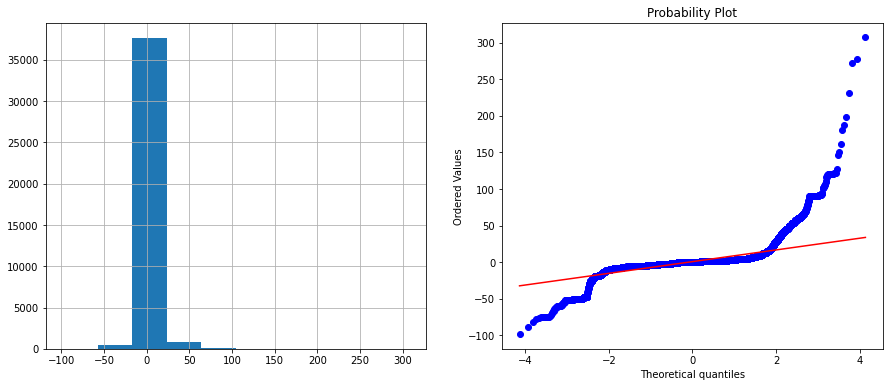

In [ ]:
diagnostic_plots(train_set, 'delay')

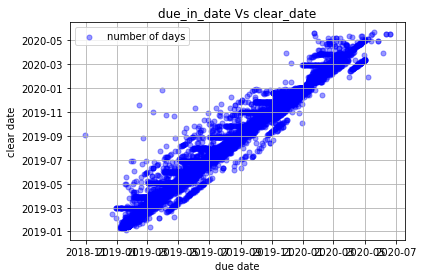

In [ ]:
from matplotlib import pyplot as plt
x=df['due_in_date']#y-axis
y=df['clear_date']#x-axis
plt.scatter(x,y,label='number of days',color='b',s=25,alpha=0.4)#scatter graph
plt.title('due_in_date Vs clear_date')
plt.xlabel('due date') #x label
plt.ylabel('clear date')#y label
plt.legend()
plt.grid()#grid
plt.show() #scatter graph between 'due_in_date' and 'clear_date'

In [ ]:
train_set['name_customer'].value_counts()

WAL-MAR in            953
WAL-MAR llc           898
WAL-MAR associates    871
WAL-MAR foundation    869
WAL-MAR corp          855
                     ... 
MASSY D in              1
H.J. HEI co             1
GROUPE  systems         1
E G AY corporation      1
UNITED  foundation      1
Name: name_customer, Length: 3868, dtype: int64

In [ ]:
#checking correlation
train_set.corr()

,doc_id,invoice_currency,total_open_amount,delay
doc_id,1.00000,-0.95985,0.11111,0.16460
invoice_currency,-0.95985,1.00000,-0.11923,-0.13959
total_open_amount,0.11111,-0.11923,1.00000,0.00742
delay,0.16460,-0.13959,0.00742,1.00000


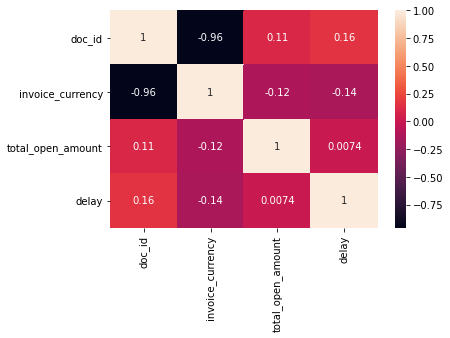

In [ ]:
#eda
import seaborn as sns
correlation = train_set.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)#heatmap


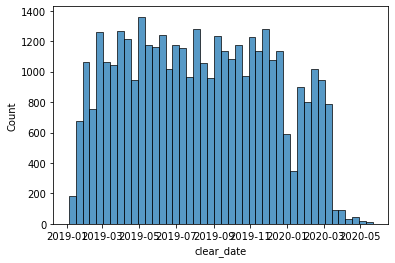

In [ ]:
sns.histplot(train_set['clear_date'])

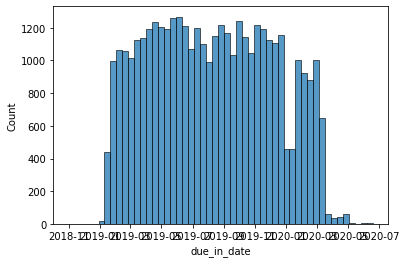

In [ ]:
sns.histplot(train_set['due_in_date'])

<function matplotlib.pyplot.show>

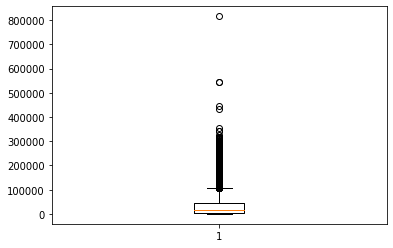

In [ ]:
plt.boxplot(train_set.total_open_amount)
plt.show

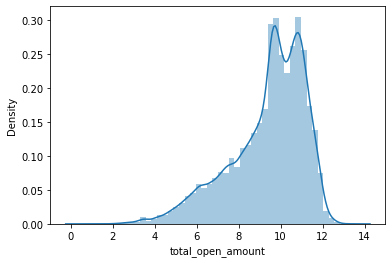

In [ ]:
a= np.log(train_set['total_open_amount'])
a.skew()
sns.distplot(a, hist = True) #right skewed

In [ ]:
train_set['delay'].value_counts()

 0      8357
 1      4742
 2      3809
-5      2973
-4      2811
        ... 
 231       1
 199       1
 103       1
-57        1
 127       1
Name: delay, Length: 185, dtype: int64

Splitting into train , validation and test sets

In [ ]:
#splitting
from sklearn.model_selection import train_test_split
x_train,x_temp = train_test_split(train_set,test_size = 0.3,shuffle=True)
x_val,x_test = train_test_split(x_temp,test_size = 0.5,shuffle=True)
print(x_train.shape)
print(x_test.shape)
x_val.shape


(27419, 13)
(5876, 13)


(5875, 13)

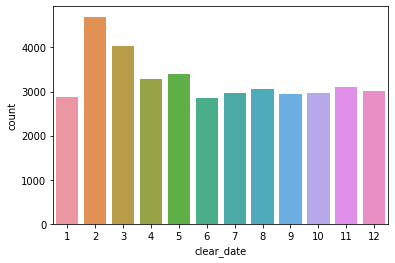

In [ ]:
month = train_set['clear_date'].dt.month
sns.countplot(x=month, data=x_train)

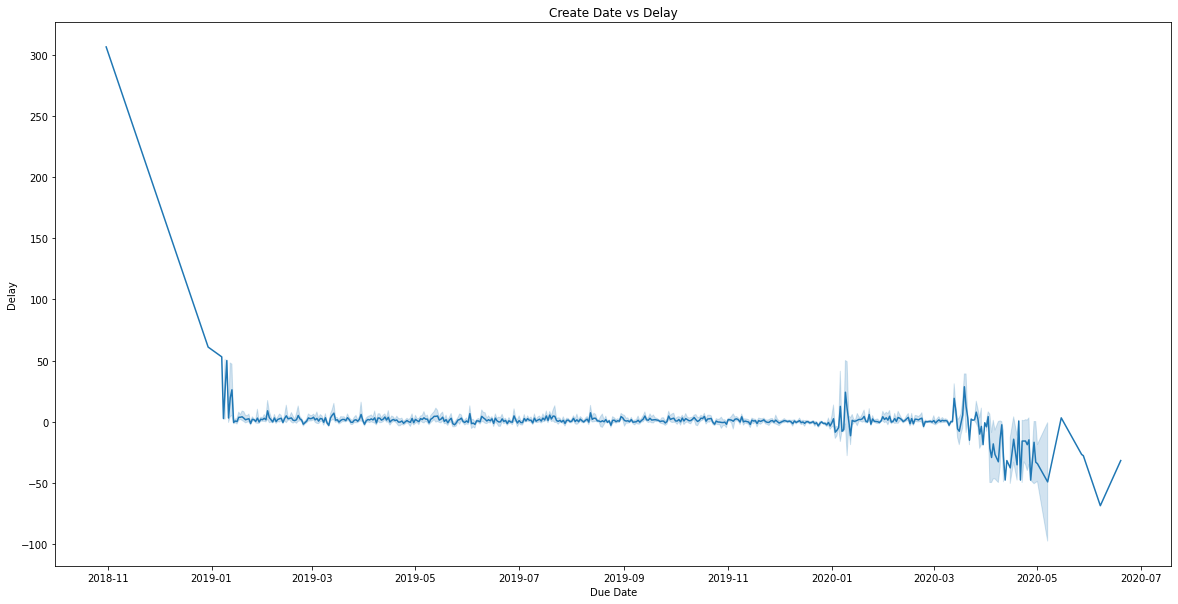

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(x=x_train['due_in_date'], y=x_train['delay'])
plt.xlabel("Due Date")
plt.ylabel("Delay")
plt.title("Create Date vs Delay")
plt.show()

In [ ]:
x_test

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay
15372,U001,0100033268,NICHOL trust,2019-06-20,1929444831,2019-06-06,2019-06-06,2019-06-21,1,24972.65000,2019-06-06,NAA8,-1
21495,U001,0200769623,WAL-MAR co,2019-08-19,1929711499,2019-08-07,2019-08-07,2019-08-22,1,10910.73000,2019-08-07,NAH4,-3
11997,U001,CCU013,KRAFT F corporation,2019-05-31,1929244714,2019-05-02,2019-05-02,2019-05-02,1,8841.60000,2019-05-02,NAX2,29
30417,U001,0200769623,WAL-MAR foundation,2019-11-19,1930104036,2019-11-07,2019-11-07,2019-11-22,1,15268.89000,2019-11-07,NAH4,-3
35784,U001,0200705742,DOT co,2020-02-21,1930416616,2020-01-20,2020-01-20,2020-02-23,1,6571.51000,2020-01-20,NAAW,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32794,U001,0200759878,SA trust,2019-12-19,1930210140,2019-12-03,2019-12-03,2019-12-18,1,12874.31000,2019-12-03,NAH4,1
11349,U001,0200714710,SYSCO in,2019-05-13,1929206311,2019-04-25,2019-04-25,2019-05-10,1,3528.59000,2019-04-25,NAA8,3
3587,U001,0200769623,WAL-MAR us,2019-02-20,1928770576,2019-02-10,2019-02-10,2019-02-25,1,15955.55000,2019-02-10,NAH4,-5
6045,U001,0200793830,M foundation,2019-03-21,1928909088,2019-03-06,2019-03-06,2019-03-21,1,90827.97000,2019-03-06,NAA8,0


In [ ]:
x_train

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay
20150,U001,0200759878,SA in,2019-08-12,1929660893,2019-07-25,2019-07-25,2019-08-09,1,10187.19000,2019-07-25,NAH4,3
9630,U001,0100025470,HACKN,2019-04-29,1929112663,2019-04-09,2019-04-09,2019-04-24,1,18193.05000,2019-04-09,NAA8,5
9293,U001,0200769623,WAL-MAR llc,2019-04-22,1929082446,2019-04-05,2019-04-05,2019-04-20,1,57284.01000,2019-04-05,NAH4,2
20081,U001,0200739006,AL associates,2019-08-08,1929651914,2019-07-24,2019-07-24,2019-08-08,1,33467.52000,2019-07-24,NAA8,0
28453,CA02,0140105847,GORDON F systems,2019-11-08,2960586667,2019-10-17,2019-10-17,2019-11-05,0,20696.56110,2019-10-26,CA10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34447,U001,0200769623,WAL-MAR us,2020-01-14,1930348534,2020-01-03,2020-01-03,2020-01-18,1,30766.53000,2020-01-03,NAH4,-4
22616,U001,0200707822,PUBLI co,2019-09-04,1929768482,2019-08-20,2019-08-20,2019-09-04,1,49144.26000,2019-08-20,NAA8,0
33400,U001,0200457993,SHAM,2019-12-31,1930261061,2019-12-10,2019-12-10,2019-12-30,1,1086.65000,2019-12-10,NAD1,1
12170,U001,0200769623,WAL-MAR foundation,2019-05-23,1929245179,2019-05-04,2019-05-04,2019-05-19,1,3080.79000,2019-05-04,NAH4,4


In [ ]:
x_val

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay
19384,CA02,0140106293,ATLANT llc,2019-08-02,2960565998,2019-07-17,2019-07-17,2019-08-05,0,50.84370,2019-07-26,CA10,-3
3097,U001,0200707822,PUBLI llc,2019-02-20,1928741852,2019-02-05,2019-02-05,2019-02-20,1,71821.35000,2019-02-05,NAA8,0
5381,U001,0200705742,DOT trust,2019-03-15,1928877140,2019-02-28,2019-02-28,2019-03-20,1,94789.40000,2019-02-28,NAD1,-5
16301,U001,0200705742,DOT foundation,2019-07-01,1929492977,2019-06-14,2019-06-14,2019-07-04,1,57.47000,2019-06-14,NAD1,-3
10945,U001,0200900909,SYSCO foundation,2019-05-08,1929178818,2019-04-22,2019-04-22,2019-05-07,1,4937.77000,2019-04-22,NAA8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36560,U001,0200704858,WAKE in,2020-02-14,1930445196,2020-01-28,2020-01-28,2020-02-12,1,130326.75000,2020-01-28,NAA8,2
17194,U001,100000051,GREE associates,2019-07-25,1929533766,2019-06-24,2019-06-24,2019-07-24,1,30476.40000,2019-06-24,NAD5,1
7227,CA02,0140104440,SO,2019-04-03,2960534674,2019-03-18,2019-03-18,2019-03-30,0,33568.63560,2019-03-20,CA10,4
12799,U001,0200759878,SA co,2019-05-28,1929277742,2019-05-10,2019-05-10,2019-05-25,1,13905.36000,2019-05-10,NAH4,3


In [ ]:
b = (train_set['delay']-train_set['delay'].min()+1) .transform(np.log)
b.describe()

count   39170.00000
mean        4.59795
std         0.10630
min         0.00000
25%         4.56435
50%         4.59512
75%         4.61512
max         6.00635
Name: delay, dtype: float64

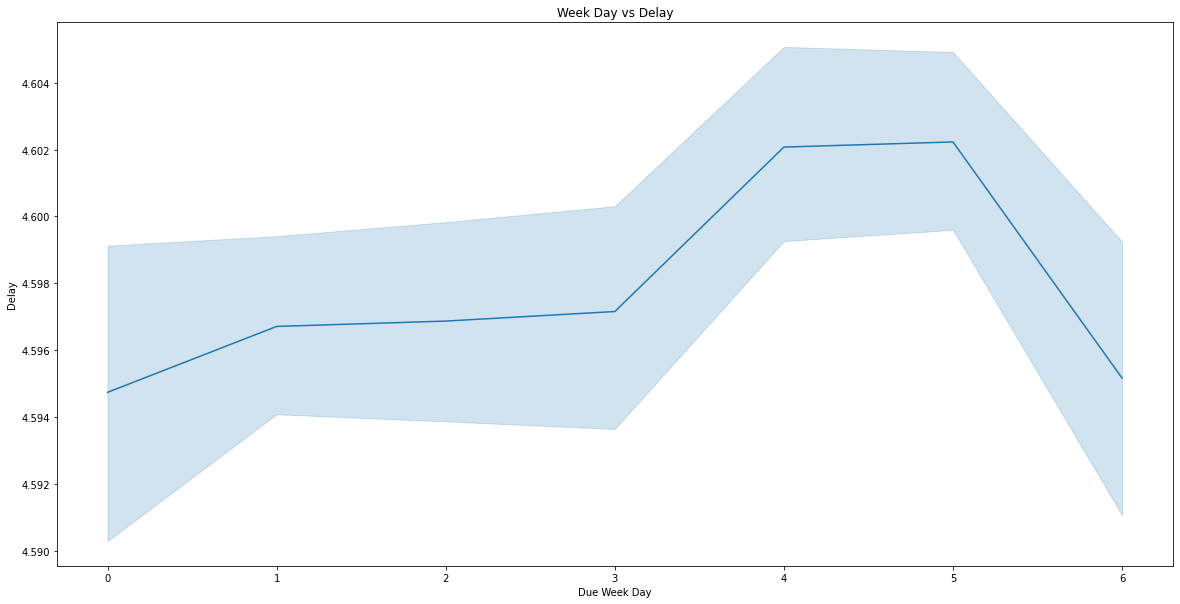

In [ ]:
#checking week day delay 
plt.figure(figsize=(20,10))
sns.lineplot(x_train['due_in_date'].dt.dayofweek, b)
plt.xlabel("Due Week Day")
plt.ylabel("Delay")
plt.title("Week Day vs Delay")
plt.show()

In [ ]:
#removing warnings
import warnings
warnings.filterwarnings("ignore")

# **Feature Engineering and Target Mean Encoding**

In [ ]:
##encoding labels and mapping it
mean_encode=x_train.groupby('cust_payment_terms')['delay'].mean()
print(mean_encode)
x_train.loc[:,'cust_payment_terms_mean_enc']=x_train['cust_payment_terms'].map(mean_encode)
x_train
x_val.loc[:,'cust_payment_terms_mean_enc']=x_val['cust_payment_terms'].map(mean_encode)
x_val
x_test.loc[:,'cust_payment_terms_mean_enc']=x_test['cust_payment_terms'].map(mean_encode)
x_val['cust_payment_terms_mean_enc'][x_val['cust_payment_terms_mean_enc'].isnull()] = mean_encode.mean()
x_test['cust_payment_terms_mean_enc'][x_test['cust_payment_terms_mean_enc'].isnull()] = mean_encode.mean()
test_set.loc[:,'cust_payment_terms_mean_enc']=test_set['cust_payment_terms'].map(mean_encode)
test_set['cust_payment_terms_mean_enc'][test_set['cust_payment_terms_mean_enc'].isnull()] = mean_encode.mean()

cust_payment_terms
90M7   -56.00000
B112     3.00000
BR56     7.42857
C106     0.75000
CA10     6.12464
          ...   
NAWM     4.00000
NAWN    -4.62903
NAWP    -8.75510
NAWU    -7.30435
NAX2    43.04011
Name: delay, Length: 67, dtype: float64


In [ ]:
x_val.isnull().sum()

business_code                  0
cust_number                    0
name_customer                  0
clear_date                     0
doc_id                         0
posting_date                   0
document_create_date.1         0
due_in_date                    0
invoice_currency               0
total_open_amount              0
baseline_create_date           0
cust_payment_terms             0
delay                          0
cust_payment_terms_mean_enc    0
dtype: int64

In [ ]:
mean_encode2=x_train.groupby('cust_number')['delay'].mean()
print(mean_encode2)
x_train.loc[:,'cust_numbers_mean_enc']=x_train['cust_number'].map(mean_encode2)
x_train

x_val.loc[:,'cust_numbers_mean_enc']=x_val['cust_number'].map(mean_encode2)
x_val
x_test.loc[:,'cust_numbers_mean_enc']=x_test['cust_number'].map(mean_encode2)
x_test['cust_numbers_mean_enc'][x_test['cust_numbers_mean_enc'].isnull()] = mean_encode2.mean()
x_val['cust_numbers_mean_enc'][x_val['cust_numbers_mean_enc'].isnull()] = mean_encode2.mean()
test_set.loc[:,'cust_numbers_mean_enc']=test_set['cust_number'].map(mean_encode2)
test_set['cust_numbers_mean_enc'][test_set['cust_numbers_mean_enc'].isnull()] = mean_encode2.mean()
test_set

cust_number
0100000048   28.00000
0100000051    1.00000
0100000158   34.66667
0100000217   -3.00000
0100000222   -4.20833
               ...   
CC7455       19.00000
CCCA02        7.71429
CCU001        6.92308
CCU002        6.24000
CCU013       42.38859
Name: delay, Length: 1145, dtype: float64


,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,cust_payment_terms_mean_enc,cust_numbers_mean_enc
1,U001,0200772670,ASSOCIAT foundation,NaT,1930760439,2020-04-07,2020-04-07,2020-04-22,1,9302.66000,2020-04-07,NAU5,1.18322,1.06606
14,U001,0200769623,WAL-MAR systems,NaT,1930790978,2020-04-16,2020-04-16,2020-05-01,1,30078.63000,2020-04-16,NAH4,-1.90667,-2.26569
16,U001,CCU013,KRAFT F corporation,NaT,1930608161,2020-03-09,2020-03-09,2020-03-09,1,575.40000,2020-03-09,NAX2,43.04011,42.38859
18,U001,0200762301,C&S WH us,NaT,1930691713,2020-03-26,2020-03-26,2020-04-10,1,19511.72000,2020-03-26,NAC6,0.56976,-0.79162
22,U001,0200749225,SUPER corporation,NaT,1930637200,2020-03-11,2020-03-11,2020-03-26,1,65768.48000,2020-03-11,NAA8,1.20427,0.93478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49981,U001,0200936373,SUPE llc,NaT,1930723219,2020-04-01,2020-04-01,2020-04-16,1,76635.04000,2020-04-01,NAA8,1.20427,1.15423
49986,U001,0200418007,AM corp,NaT,1930797845,2020-04-23,2020-04-23,2020-05-08,1,7694.64000,2020-04-23,NAA8,1.20427,-3.76400
49989,U001,0200705742,DOT llc,NaT,1930702272,2020-04-01,2020-04-01,2020-05-05,1,3316.64000,2020-04-01,NAAW,-15.56198,-6.69042
49994,U001,0200769623,WAL-MAR corp,NaT,1930685404,2020-03-21,2020-03-21,2020-04-05,1,14309.55000,2020-03-21,NAH4,-1.90667,-2.26569


In [ ]:
mean_encode4=x_train.groupby('due_in_date')['delay'].mean()
print(mean_encode4)
x_train.loc[:,'due_in_date_mean_enc']=x_train['due_in_date'].map(mean_encode4)
x_train
x_val.loc[:,'due_in_date_mean_enc']=x_val['due_in_date'].map(mean_encode4)
x_val
x_test.loc[:,'due_in_date_mean_enc']=x_test['due_in_date'].map(mean_encode4)
x_test
x_val['due_in_date_mean_enc'][x_val['due_in_date_mean_enc'].isnull()] = mean_encode4.mean()
x_test['due_in_date_mean_enc'][x_test['due_in_date_mean_enc'].isnull()] = mean_encode4.mean()
test_set.loc[:,'due_in_date_mean_enc']=test_set['due_in_date'].map(mean_encode4)
test_set['due_in_date_mean_enc'][test_set['due_in_date_mean_enc'].isnull()] = mean_encode4.mean()
test_set

due_in_date
2018-10-31   307.00000
2018-12-30    61.00000
2018-12-31    60.00000
2019-01-04    56.00000
2019-01-07    53.00000
                ...   
2020-05-15     3.00000
2020-05-27   -27.00000
2020-05-28   -28.00000
2020-06-07   -69.00000
2020-06-19   -32.00000
Name: delay, Length: 486, dtype: float64


,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,cust_payment_terms_mean_enc,cust_numbers_mean_enc,due_in_date_mean_enc
1,U001,0200772670,ASSOCIAT foundation,NaT,1930760439,2020-04-07,2020-04-07,2020-04-22,1,9302.66000,2020-04-07,NAU5,1.18322,1.06606,-16.00000
14,U001,0200769623,WAL-MAR systems,NaT,1930790978,2020-04-16,2020-04-16,2020-05-01,1,30078.63000,2020-04-16,NAH4,-1.90667,-2.26569,-34.57143
16,U001,CCU013,KRAFT F corporation,NaT,1930608161,2020-03-09,2020-03-09,2020-03-09,1,575.40000,2020-03-09,NAX2,43.04011,42.38859,0.20000
18,U001,0200762301,C&S WH us,NaT,1930691713,2020-03-26,2020-03-26,2020-04-10,1,19511.72000,2020-03-26,NAC6,0.56976,-0.79162,-2.66667
22,U001,0200749225,SUPER corporation,NaT,1930637200,2020-03-11,2020-03-11,2020-03-26,1,65768.48000,2020-03-11,NAA8,1.20427,0.93478,7.66667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49981,U001,0200936373,SUPE llc,NaT,1930723219,2020-04-01,2020-04-01,2020-04-16,1,76635.04000,2020-04-01,NAA8,1.20427,1.15423,0.56419
49986,U001,0200418007,AM corp,NaT,1930797845,2020-04-23,2020-04-23,2020-05-08,1,7694.64000,2020-04-23,NAA8,1.20427,-3.76400,0.56419
49989,U001,0200705742,DOT llc,NaT,1930702272,2020-04-01,2020-04-01,2020-05-05,1,3316.64000,2020-04-01,NAAW,-15.56198,-6.69042,0.56419
49994,U001,0200769623,WAL-MAR corp,NaT,1930685404,2020-03-21,2020-03-21,2020-04-05,1,14309.55000,2020-03-21,NAH4,-1.90667,-2.26569,-18.33333


In [ ]:
x_val.isnull().sum()

business_code                  0
cust_number                    0
name_customer                  0
clear_date                     0
doc_id                         0
posting_date                   0
document_create_date.1         0
due_in_date                    0
invoice_currency               0
total_open_amount              0
baseline_create_date           0
cust_payment_terms             0
delay                          0
cust_payment_terms_mean_enc    0
cust_numbers_mean_enc          0
due_in_date_mean_enc           0
dtype: int64

In [ ]:
x_test.isnull().sum()

business_code                  0
cust_number                    0
name_customer                  0
clear_date                     0
doc_id                         0
posting_date                   0
document_create_date.1         0
due_in_date                    0
invoice_currency               0
total_open_amount              0
baseline_create_date           0
cust_payment_terms             0
delay                          0
cust_payment_terms_mean_enc    0
cust_numbers_mean_enc          0
due_in_date_mean_enc           0
dtype: int64

In [ ]:
x_val.isnull().sum() #checking null values

business_code                  0
cust_number                    0
name_customer                  0
clear_date                     0
doc_id                         0
posting_date                   0
document_create_date.1         0
due_in_date                    0
invoice_currency               0
total_open_amount              0
baseline_create_date           0
cust_payment_terms             0
delay                          0
cust_payment_terms_mean_enc    0
cust_numbers_mean_enc          0
due_in_date_mean_enc           0
dtype: int64

In [ ]:
x_val.dtypes

business_code                          object
cust_number                            object
name_customer                          object
clear_date                     datetime64[ns]
doc_id                                  int64
posting_date                   datetime64[ns]
document_create_date.1         datetime64[ns]
due_in_date                    datetime64[ns]
invoice_currency                        int64
total_open_amount                     float64
baseline_create_date           datetime64[ns]
cust_payment_terms                     object
delay                                   int64
cust_payment_terms_mean_enc           float64
cust_numbers_mean_enc                 float64
due_in_date_mean_enc                  float64
dtype: object

In [ ]:
x_train.corr() #checking correlation

,doc_id,invoice_currency,total_open_amount,delay,cust_payment_terms_mean_enc,cust_numbers_mean_enc,due_in_date_mean_enc
doc_id,1.00000,-0.97069,0.10295,0.16350,0.23110,0.20886,0.03157
invoice_currency,-0.97069,1.00000,-0.10785,-0.13855,-0.23451,-0.20677,-0.02978
total_open_amount,0.10295,-0.10785,1.00000,0.00623,0.06130,0.00726,0.02025
delay,0.16350,-0.13855,0.00623,1.00000,0.59140,0.67005,0.29556
cust_payment_terms_mean_enc,0.23110,-0.23451,0.06130,0.59140,1.00000,0.73641,0.21932
cust_numbers_mean_enc,0.20886,-0.20677,0.00726,0.67005,0.73641,1.00000,0.12869
due_in_date_mean_enc,0.03157,-0.02978,0.02025,0.29556,0.21932,0.12869,1.00000


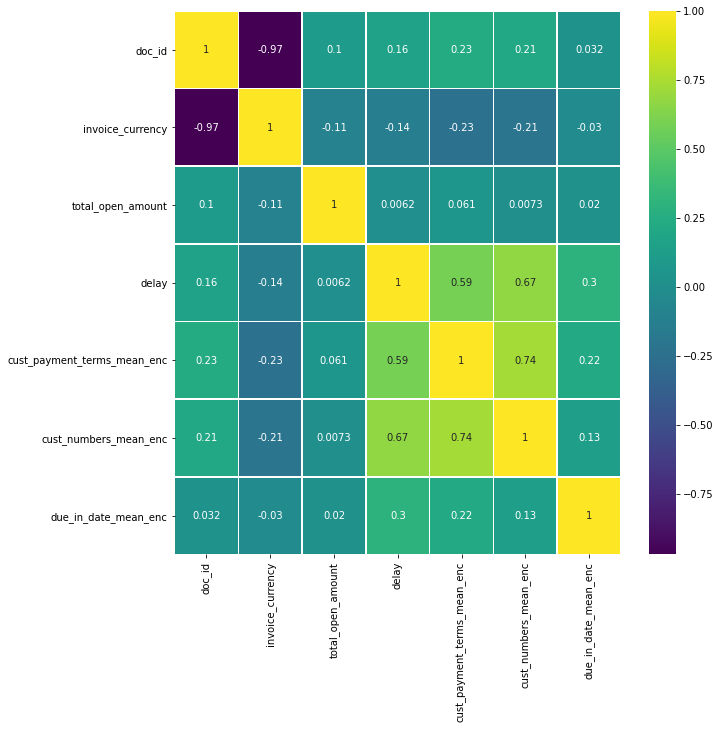

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(x_train.corr(),annot=True,cmap='viridis',linewidths=.5)

model prediction

In [ ]:
features = [  'invoice_currency','due_in_date_mean_enc' , 'cust_payment_terms_mean_enc' ,'cust_numbers_mean_enc'   ]

In [ ]:
y_train = x_train['delay']
X_train = x_train[features] 
X_val = x_val[features]
y_val = x_val['delay']
X_test = x_test[features]
Y_test = x_test['delay']
b_test = test_set[features]
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

selecting features

# **RANDOM FOREST**

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(RandomForestRegressor(n_estimators=10),
          k_features=4,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 4)
sfs.fit(X_train,y_train)
sfs.k_feature_names_

('invoice_currency',
 'due_in_date_mean_enc',
 'cust_payment_terms_mean_enc',
 'cust_numbers_mean_enc')

In [ ]:
#train set  mse and rmse
from math import sqrt
from sklearn.metrics import mean_squared_error
predicted =model.predict(X_train)
print((mean_squared_error(y_train,predicted)))
print(sqrt(mean_squared_error(y_train,predicted)))
from sklearn.metrics import r2_score
print(r2_score(y_train,predicted))

18.49260913207366
4.3003033767483965
0.8450872250424325


In [ ]:
#val set  mse and rmse
predicted =model.predict(X_val)
print((mean_squared_error(y_val,predicted)))
print(sqrt(mean_squared_error(y_val,predicted)))
from sklearn.metrics import r2_score
print(r2_score(y_val,predicted))
predicted

68.91029109712126
8.301222265252344
0.4601843793005942


array([ 5.17566667,  0.01      , -4.397     , ...,  4.47071429,
        2.988     ,  1.91      ])

In [ ]:
#checking null values 
x_test.isnull().sum()

business_code                  0
cust_number                    0
name_customer                  0
clear_date                     0
doc_id                         0
posting_date                   0
document_create_date.1         0
due_in_date                    0
invoice_currency               0
total_open_amount              0
baseline_create_date           0
cust_payment_terms             0
delay                          0
cust_payment_terms_mean_enc    0
cust_numbers_mean_enc          0
due_in_date_mean_enc           0
dtype: int64

In [ ]:
#test set mse and rmse
predicted =model.predict(X_test)
print((mean_squared_error(Y_test,predicted)))
print(sqrt(mean_squared_error(Y_test,predicted)))
from sklearn.metrics import r2_score
print(r2_score(Y_test,predicted))

#around 42 percent accuracy

73.41113876351997
8.568030039835293
0.41162830935821426


In [ ]:
predicted_delay =model.predict(b_test)
predicted_delay

array([  0.66916667,  -4.075     ,  37.1       , ..., -16.9105    ,
        -4.075     ,  -0.25958333])

In [ ]:
#creating aging bucket
predicted_aging_bucket = []
for item in predicted_delay:
    if item<=15:
        predicted_aging_bucket.append('0-15 days')
    elif item<=30:
        predicted_aging_bucket.append('16-30 days')
    elif item<=45:
        predicted_aging_bucket.append('31-45 days')
    elif item<=60:
        predicted_aging_bucket.append('46-60 days')
    else:
        predicted_aging_bucket.append('>60 days')


In [ ]:
test_set['Predicted delay'] = predicted_delay  #rounded the value
test_set['Predicted clear-date  '] = pd.to_datetime(test_set['due_in_date'],format = '%Y%m%d') + pd.to_timedelta(round(test_set['Predicted delay']),unit= 'd')
test_set['Predicted ageing bucket'] = predicted_aging_bucket

In [ ]:
test_set['Predicted delay']=test_set[['Predicted delay']].astype('int64') #changing predicted delay to integer

In [ ]:
test_set #predicted values 

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,cust_payment_terms_mean_enc,cust_numbers_mean_enc,due_in_date_mean_enc,Predicted delay,Predicted clear-date,Predicted ageing bucket
1,U001,0200772670,ASSOCIAT foundation,NaT,1930760439,2020-04-07,2020-04-07,2020-04-22,1,9302.66000,2020-04-07,NAU5,1.18322,1.06606,-16.00000,0,2020-04-23,0-15 days
14,U001,0200769623,WAL-MAR systems,NaT,1930790978,2020-04-16,2020-04-16,2020-05-01,1,30078.63000,2020-04-16,NAH4,-1.90667,-2.26569,-34.57143,-4,2020-04-27,0-15 days
16,U001,CCU013,KRAFT F corporation,NaT,1930608161,2020-03-09,2020-03-09,2020-03-09,1,575.40000,2020-03-09,NAX2,43.04011,42.38859,0.20000,37,2020-04-15,31-45 days
18,U001,0200762301,C&S WH us,NaT,1930691713,2020-03-26,2020-03-26,2020-04-10,1,19511.72000,2020-03-26,NAC6,0.56976,-0.79162,-2.66667,0,2020-04-10,0-15 days
22,U001,0200749225,SUPER corporation,NaT,1930637200,2020-03-11,2020-03-11,2020-03-26,1,65768.48000,2020-03-11,NAA8,1.20427,0.93478,7.66667,0,2020-03-26,0-15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49981,U001,0200936373,SUPE llc,NaT,1930723219,2020-04-01,2020-04-01,2020-04-16,1,76635.04000,2020-04-01,NAA8,1.20427,1.15423,0.56419,0,2020-04-17,0-15 days
49986,U001,0200418007,AM corp,NaT,1930797845,2020-04-23,2020-04-23,2020-05-08,1,7694.64000,2020-04-23,NAA8,1.20427,-3.76400,0.56419,0,2020-05-09,0-15 days
49989,U001,0200705742,DOT llc,NaT,1930702272,2020-04-01,2020-04-01,2020-05-05,1,3316.64000,2020-04-01,NAAW,-15.56198,-6.69042,0.56419,-16,2020-04-18,0-15 days
49994,U001,0200769623,WAL-MAR corp,NaT,1930685404,2020-03-21,2020-03-21,2020-04-05,1,14309.55000,2020-03-21,NAH4,-1.90667,-2.26569,-18.33333,-4,2020-04-01,0-15 days


In [ ]:
import base64
import pandas as pd
from IPython.display import HTML

def create_download_link( test_set, title = "Download CSV file", filename = " test_set1.csv"):
    csv = test_set.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(test_set)